In [1]:
import sys
import rootpath
sys.path.append(rootpath.detect())

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import wfg
from testsuite.utilities import Pareto_split
from experiments.igd_refpoints.igd_utilities import *
from scipy.spatial import distance_matrix

In [2]:
y = abs(np.random.multivariate_normal([0., 0.], np.diag([2**2, 4**2]), size=2000))

In [3]:
func = wfg.WFG4
n_obj = 2
l = 3
k = 3
n_dim = k+l

In [4]:
M = n_obj
N = 200
yw = np.zeros((N, n_obj))
x = np.zeros((N, n_dim))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    yw[n,:] = func(z, k, M)
    x[n,:] = z
  
pi, di = Pareto_split(yw, return_indices=True)

assert pi.shape[0]+di.shape[0] == N
assert yw.shape[1] == n_obj

In [5]:
a = np.round(yw.max(axis=0))[0]
b = np.round(yw.max(axis=0))[1]

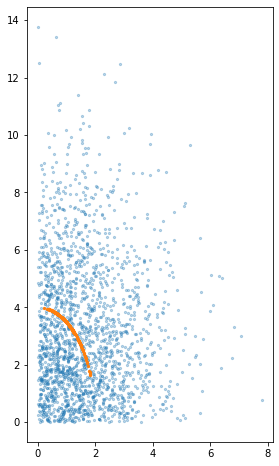

In [6]:
fig = plt.figure(figsize=[8, 8])
ax = fig.gca()
ax.scatter(*y.T, s=5, alpha=0.3, c="C0")
ax.scatter(*yw.T, s=5, c="C1")
ax.set_aspect("equal")


In [7]:
y2 = normalise_to_axes(y, [a,b])

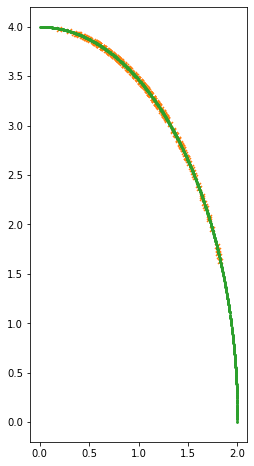

In [8]:
fig = plt.figure(figsize=[8, 8])
ax = fig.gca()
ax.scatter(*yw.T, s=25, c="C1", marker="x")
ax.scatter(*y2.T, s=2, c="C2")
ax.set_aspect('equal')

In [9]:
ya = attainment_sample(y2, 200)

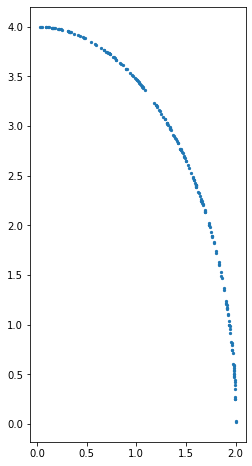

In [10]:
fig = plt.figure(figsize=[8, 8])
ax = fig.gca()
ax.scatter(*ya.T, s=5)
ax.set_aspect('equal')

In [11]:
ya = normalise_to_axes(ya, [a, b])

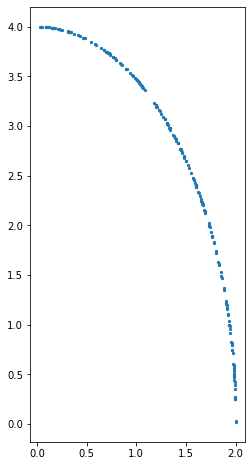

In [12]:
fig = plt.figure(figsize=[8, 8])
ax = fig.gca()
ax.scatter(*ya.T, s=5)
ax.set_aspect('equal')

In [13]:
y = abs(np.random.multivariate_normal([0., 0., 0.], np.diag([2**2, 4**2, 6**2]), size=200000))
yn = normalise_to_axes(y, axes=[2, 4, 6])

No handles with labels found to put in legend.


[2, 4, 6]
3d


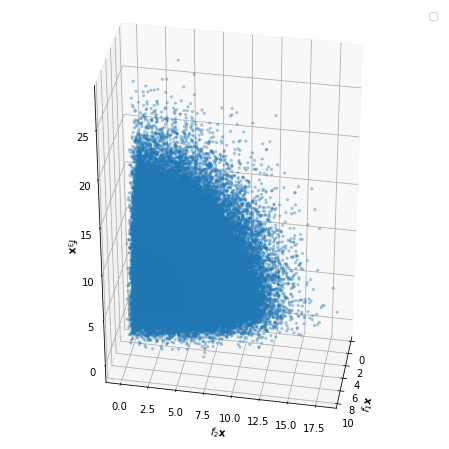

In [14]:
fig = plt.figure(figsize=[8, 8])
ax = fig.gca(projection="3d")
ax.scatter(*y.T, s=5, alpha=0.3, c="C0")
ax.scatter(*yn.T, s=5, c="C1")
ax_format(ax, axes=[2, 4, 6], vp=[35, 10])

In [16]:
y_at = attainment_sample(yn, 5000)
y_at.shape

(5000, 3)

No handles with labels found to put in legend.


[2, 4, 6]
3d


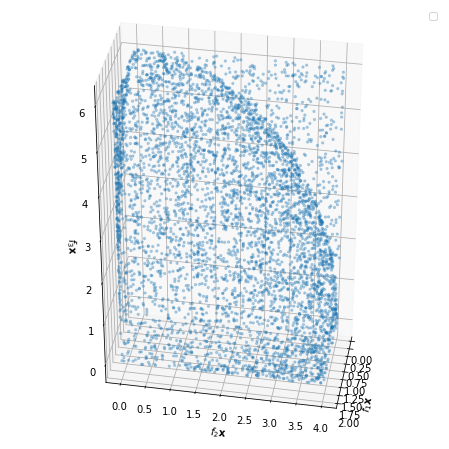

In [17]:
fig = plt.figure(figsize=[8, 8])
ax = fig.gca(projection="3d")
ax.scatter(*y_at.T, s=5, alpha=0.3, c="C0")
ax_format(ax, axes=[2, 4, 6], vp=[35, 10])

In [ ]:
aa = distance_matrix(yn, y_at)
aa.shape

In [ ]:
D = aa.min(axis=0)
D2 = aa.min(axis=1)

In [ ]:
bb = [sum(D<i) for i in np.linspace(0.01, 0.5, 200)]
bb2 = [sum(D2<i) for i in np.linspace(0.01, 0.5, 200)]

In [ ]:
fig = plt.figure()
ax = fig.gca()
ax.plot(np.linspace(0.01, 0.5, 200), np.array(bb)/len(D), label="Pareto surface points")
ax.plot(np.linspace(0.01, 0.5, 200), np.array(bb2)/len(D2), label="Attainment surface points")

ax.set_xlabel("Threshhold distance")
ax.set_ylabel("n below threshold/n totaal")

thresh = 0.15

ax.axvline(thresh, linestyle="--", c="r", label=r"~$100\%$ Pareto points within threshold")

ax.legend()
ax.set_xlim([0, 0.5])
ax.set_ylim([0, 1.1])

In [ ]:
%matplotlib qt

In [ ]:
fig = plt.figure(figsize=[8, 8])
ax = fig.gca(projection="3d")
ax_format(ax, axes=[2, 4, 6], vp=[35, 15])
ax.scatter(*y_at[D<thresh].T, s=2, c="C0", label="Attainment points < nn threshold")
ax.scatter(*y_at[D>thresh].T, s=2, c="C1", label="Attainment points > nn threshold")
ax.legend()

In [ ]:
yf = normalise_to_axes(y_at[D<thresh], [2, 4, 6])

In [ ]:
fig = plt.figure(figsize=[8, 8])
ax = fig.gca(projection="3d")
ax_format(ax, axes=[2, 4, 6], vp=[35, 15])
ax.scatter(*yf.T, s=2, c="C0", label="Attainment points < nn threshold")
ax.legend()